<a href="https://colab.research.google.com/github/abdullatif14/Decision_Trees_and_svm_week8/blob/main/Decision_Trees_and_Support_Vector_Machines_IP_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Questions

##a)Specifying the questions
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##b)Defining the metric for success
•Data cleaning(outliers and missing values)

•Univariate analysis

•Bivariate analysis

•Implementing the Solution

•Recommendations

##c)Understanding the context

The data provided is about a destructive disease known as hypothyroid. This is a Hypothyroidism's deficiency of thyroid hormones which can disrupt things like heart rate, body temperature and all aspects of metabolism.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

So we are going to build a model to assist the Nairobi Hospital overcome some of the challenges treating patients with Hypothroid.

##d)Recording the experimental design
1.Exploratory Data Analysis

2.Checking Multicollinearity

3.Feature Engineering

4.Optimizing Decision Trees

5.Support Vector Machines

6.Evaluating the model

7.Prediction



##e)Data relevance

#Reading and Data Cleaning

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#laoding the dataset
hyp = pd.read_csv('hypothyroid.csv')
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


__Data Preparation__

In [3]:
hyp.shape

(3163, 26)

In [4]:
# Lets check for missing values
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [5]:
# lets check if the data has the right data types

hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [13]:
#converting numerical cols
hyp.age = pd.to_numeric(hyp.age, errors='coerce')
hyp.TSH = pd.to_numeric(hyp.TSH, errors='coerce')
hyp.T3 = pd.to_numeric(hyp.T3, errors='coerce')
hyp.TT4 = pd.to_numeric(hyp.TT4, errors='coerce')
hyp.T4U = pd.to_numeric(hyp.T4U, errors='coerce')
hyp.FTI = pd.to_numeric(hyp.FTI, errors='coerce')
hyp.TBG = pd.to_numeric(hyp.TBG, errors='coerce')

In [14]:
#lets see if it has changed
hyp.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [15]:
hyp.nunique()

status                         2
age                           92
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

**Univariate analysis**

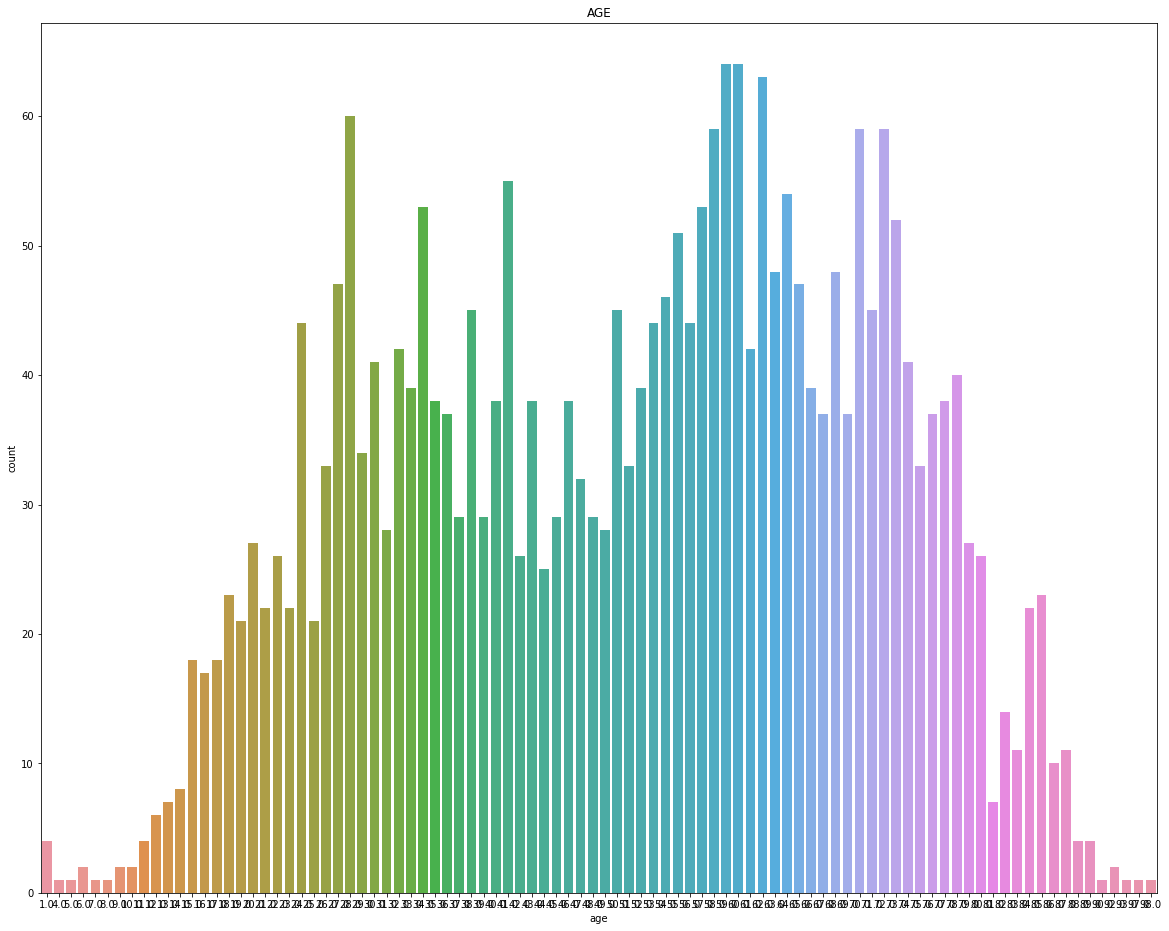

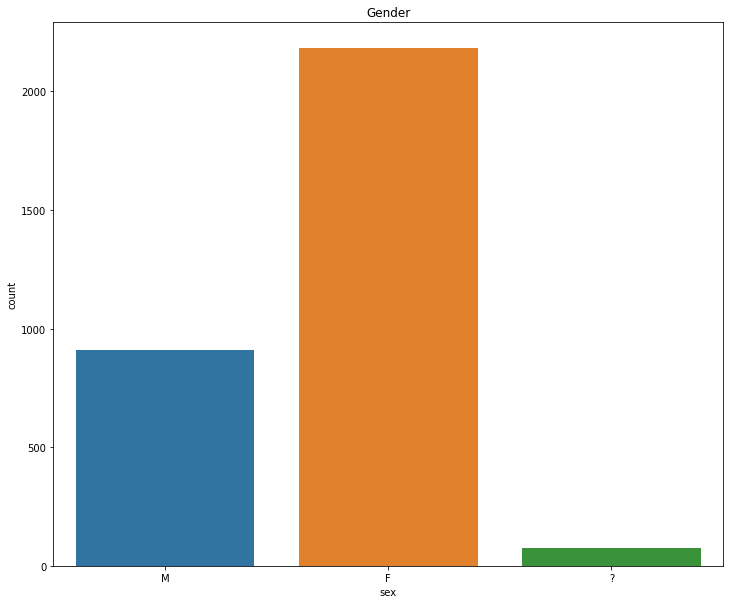

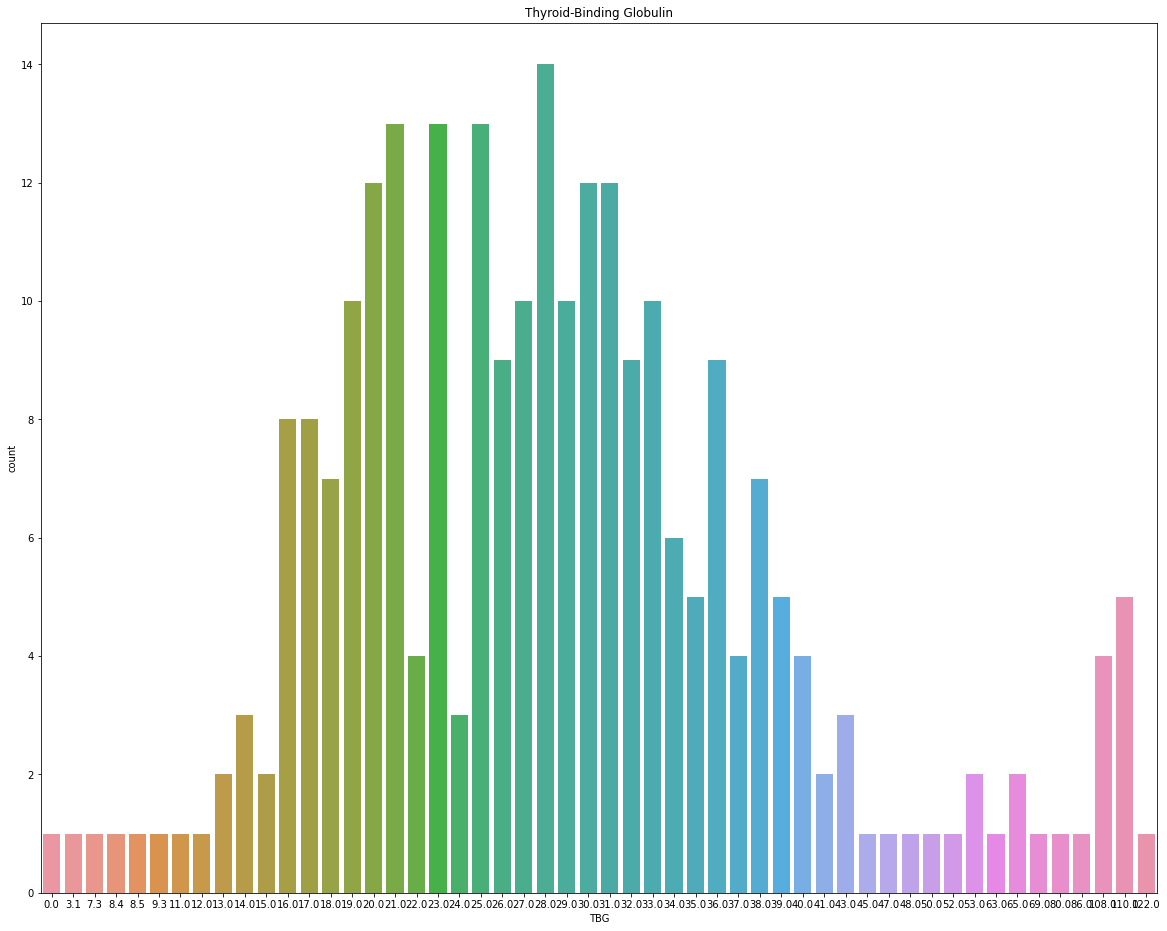

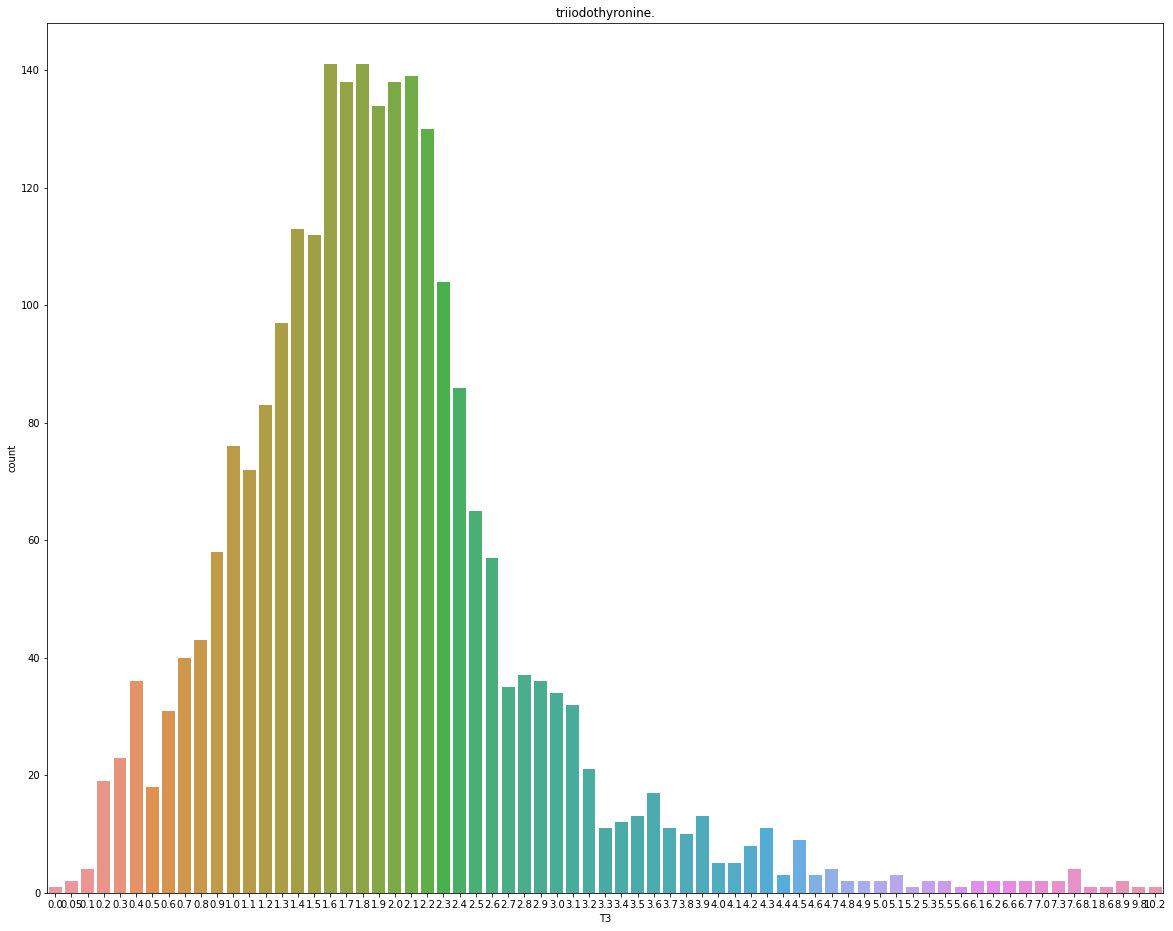

In [21]:

# lets plot some of the variables in  histogram
plt.figure(figsize = [20,16])
sns.countplot(x='age',data=hyp)
plt.title('AGE')
plt.show()

plt.figure(figsize = [12,10])
sns.countplot(x='sex',data=hyp)
plt.title('Gender')
plt.show()

plt.figure(figsize = [20,16])
sns.countplot(x='TBG',data=hyp)
plt.title('Thyroid-Binding Globulin')
plt.show()

plt.figure(figsize = [20,16])
sns.countplot(x='T3',data=hyp)
plt.title('triiodothyronine.')
plt.show()


